Embeddings shape: (7, 384)
Reduced shape for plotting: (7, 2)


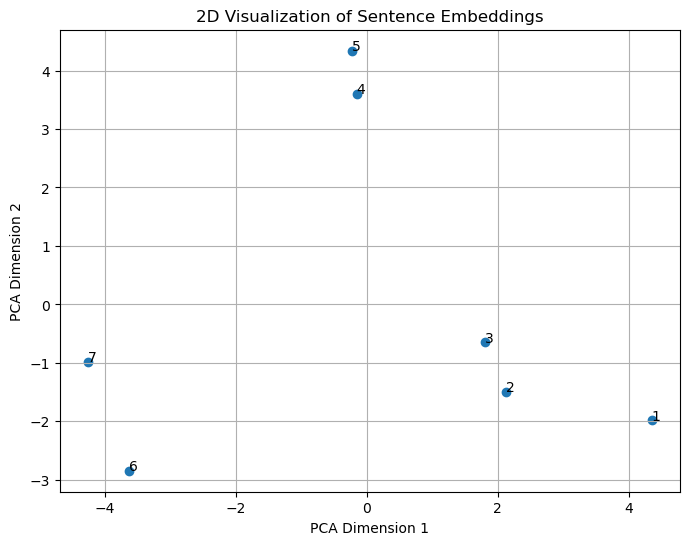

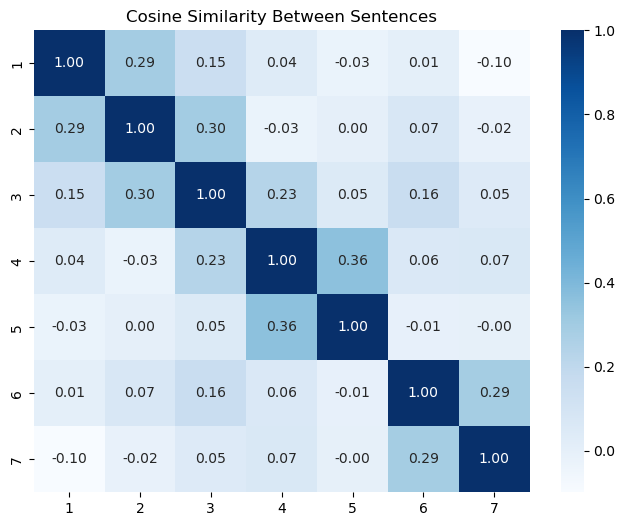

Similarity between:
'Missing flamingo discovered at swimming pool'
and
'Sea otter spotted on surfboard by beach'
is 0.2936


In [1]:
# 1️⃣ Install libraries if needed:
# pip install transformers numpy scikit-learn matplotlib seaborn

from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load an open-source embeddings model
# We use 'sentence-transformers/all-MiniLM-L6-v2' which is small, fast, free
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# 3️⃣ Function to get embeddings
def get_embedding(text):
    # Tokenize: Convert words to numbers
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():  # We do not want to train, just get embeddings
        model_output = model(**encoded_input)
    # We average the token embeddings to get a sentence embedding
    embeddings = model_output.last_hidden_state.mean(dim=1)
    return embeddings[0].numpy()  # Convert to NumPy array

# 4️⃣ Create example texts
texts = [
    "Missing flamingo discovered at swimming pool",
    "Sea otter spotted on surfboard by beach",
    "Baby panda enjoys boat ride",
    "Breakfast themed food truck beloved by all!",
    "New curry restaurant aims to please!",
    "Python developers are wonderful people",
    "TypeScript, C++ or Java? All are great!"
]

# 5️⃣ Get embeddings for each text
embeddings = np.array([get_embedding(text) for text in texts])

print("Embeddings shape:", embeddings.shape)

# 6️⃣ Reduce embeddings from 384 dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

print("Reduced shape for plotting:", embeddings_2d.shape)

# 7️⃣ Plot the 2D embeddings
plt.figure(figsize=(8,6))
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1])

for i, text in enumerate(texts):
    plt.annotate(f"{i+1}", (embeddings_2d[i,0], embeddings_2d[i,1]))

plt.title("2D Visualization of Sentence Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.grid(True)
plt.show()

# 8️⃣ Plot cosine similarity heatmap
cos_sim_matrix = cosine_similarity(embeddings)

plt.figure(figsize=(8,6))
sns.heatmap(cos_sim_matrix, xticklabels=[f"{i+1}" for i in range(len(texts))],
            yticklabels=[f"{i+1}" for i in range(len(texts))],
            annot=True, fmt=".2f", cmap="Blues")
plt.title("Cosine Similarity Between Sentences")
plt.show()

# 9️⃣ Check similarity between specific pairs
idx1, idx2 = 0, 1  # Check similarity between sentence 1 and 2
sim_value = cosine_similarity([embeddings[idx1]], [embeddings[idx2]])[0][0]
print(f"Similarity between:\n'{texts[idx1]}'\nand\n'{texts[idx2]}'\nis {sim_value:.4f}")
